In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('D:\Projects\Mushroom Classification/mushrooms.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2757,e,x,y,n,t,n,f,c,b,n,t,b,s,s,w,p,p,w,o,p,n,v,d
3831,p,x,s,w,f,c,f,w,n,n,e,b,s,s,w,w,p,w,o,p,k,v,d
1773,e,x,y,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,s,g
2917,e,f,f,n,t,n,f,c,b,p,t,b,s,s,p,p,p,w,o,p,k,y,d
5461,p,x,y,n,f,s,f,c,n,b,t,?,s,k,w,p,p,w,o,e,w,v,d
1275,p,f,s,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1003,p,x,s,w,t,p,f,c,n,w,e,e,s,s,w,w,p,w,o,p,k,v,g
968,e,x,s,n,f,n,f,w,b,k,t,e,f,f,w,w,p,w,o,e,k,s,g
7014,p,f,y,n,f,f,f,c,n,b,t,?,s,k,p,p,p,w,o,e,w,v,d
4774,p,x,f,y,f,f,f,c,b,h,e,b,k,k,p,n,p,w,o,l,h,v,d


In [5]:
df.shape

(8124, 23)

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# Unique values in columns
for column in df.columns:
    print(f"{column} : {df[column].unique()}")

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [8]:
mapped_df = df.copy()
feature_name_mappings = {
    "class":{'e':'edible','p':'poisonous'},
    "cap-shape": {'b':"bell","c":"conical","x":"convex","f":"flat", "k":"knobbed","s":"sunken"},
    'cap-surface': {'f':"fibrous","g":"grooves","y":"scaly","s":"smooth"},
    "cap-color": {'n':"brown",'b':'buff','c':'cinnamon','g':'gray','r':"green",'p':'pink','u':'purple','e':'red',
                  'w':'white','y':'yellow'},
    "bruises":{'t': 'bruises', 'f': 'no'},
    "odor":{'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 
            'p': 'pungent', 's': 'spicy'},
    "gill-attachment":{'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    "gill-spacing":{'c': 'close', 'w': 'crowded', 'd': 'distant'},
    "gill-size":{'b': 'broad', 'n': 'narrow'},
    "gill-color":{'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': ' green', 'o': 'orange', 
                  'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "stalk-shape":{'e': 'enlarging', 't': 'tapering'},
    "stalk-root":{'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted',
                  '?': 'missing'},
    "stalk-surface-above-ring":{'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    "stalk-surface-below-ring":{'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    "stalk-color-above-ring":{'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 
                              'e': 'red', 'w': 'white', 'y': 'yellow'},
    "stalk-color-below-ring":{'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink',
                              'e': 'red', 'w': 'white', 'y': 'yellow'},
    "veil-type":{'p': 'partial', 'u': 'universal'},
    "veil-color":{'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    "ring-number":{'n': 'none', 'o': 'one', 't': 'two'},
    "ring-type":{'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant',
                 's': 'sheathing', 'z': 'zone'},
    "spore-print-color":{'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange',
                         'u': 'purple', 'w': 'white', 'y': 'yellow'},
    "population":{'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    "habitat":{'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}
for column in mapped_df.columns:
    mapping_dict = feature_name_mappings[column]
    for index in range(len(mapped_df[column])):
        mapped_df[column][index] = mapping_dict[mapped_df[column][index]]

In [9]:
mapped_df.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6721,poisonous,convex,smooth,red,no,foul,free,close,narrow,buff,tapering,missing,smooth,silky,pink,white,partial,white,one,evanescent,white,several,leaves
5696,poisonous,flat,scaly,yellow,no,foul,free,close,broad,chocolate,enlarging,bulbous,silky,silky,pink,pink,partial,white,one,large,chocolate,solitary,grasses
237,edible,bell,scaly,yellow,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,scattered,grasses
5495,poisonous,flat,scaly,yellow,no,foul,free,close,broad,gray,enlarging,bulbous,silky,silky,buff,buff,partial,white,one,large,chocolate,solitary,paths
4719,edible,flat,fibrous,red,bruises,none,free,close,broad,white,tapering,bulbous,smooth,smooth,gray,white,partial,white,one,pendant,brown,several,woods
5593,poisonous,flat,scaly,pink,bruises,none,free,close,broad,green,enlarging,bulbous,smooth,smooth,white,white,partial,white,two,pendant,green,several,meadows
5961,edible,convex,scaly,brown,bruises,none,free,close,broad,white,enlarging,missing,smooth,smooth,red,white,partial,white,two,evanescent,white,clustered,waste
3269,poisonous,flat,fibrous,gray,no,foul,free,close,broad,gray,enlarging,bulbous,silky,silky,brown,brown,partial,white,one,large,chocolate,several,woods
5657,poisonous,flat,smooth,gray,bruises,foul,free,close,broad,white,tapering,bulbous,fibrous,fibrous,white,white,partial,white,one,pendant,chocolate,scattered,urban
3027,poisonous,convex,fibrous,gray,no,foul,free,close,broad,gray,enlarging,bulbous,silky,silky,brown,buff,partial,white,one,large,chocolate,solitary,woods


In [10]:
features = ['cap-shape', 'cap-surface', 'cap-color', 'veil-color', 'odor',
       'ring-type', 'spore-print-color', 'stalk-color-above-ring', 'gill-color',
       'stalk-color-below-ring']

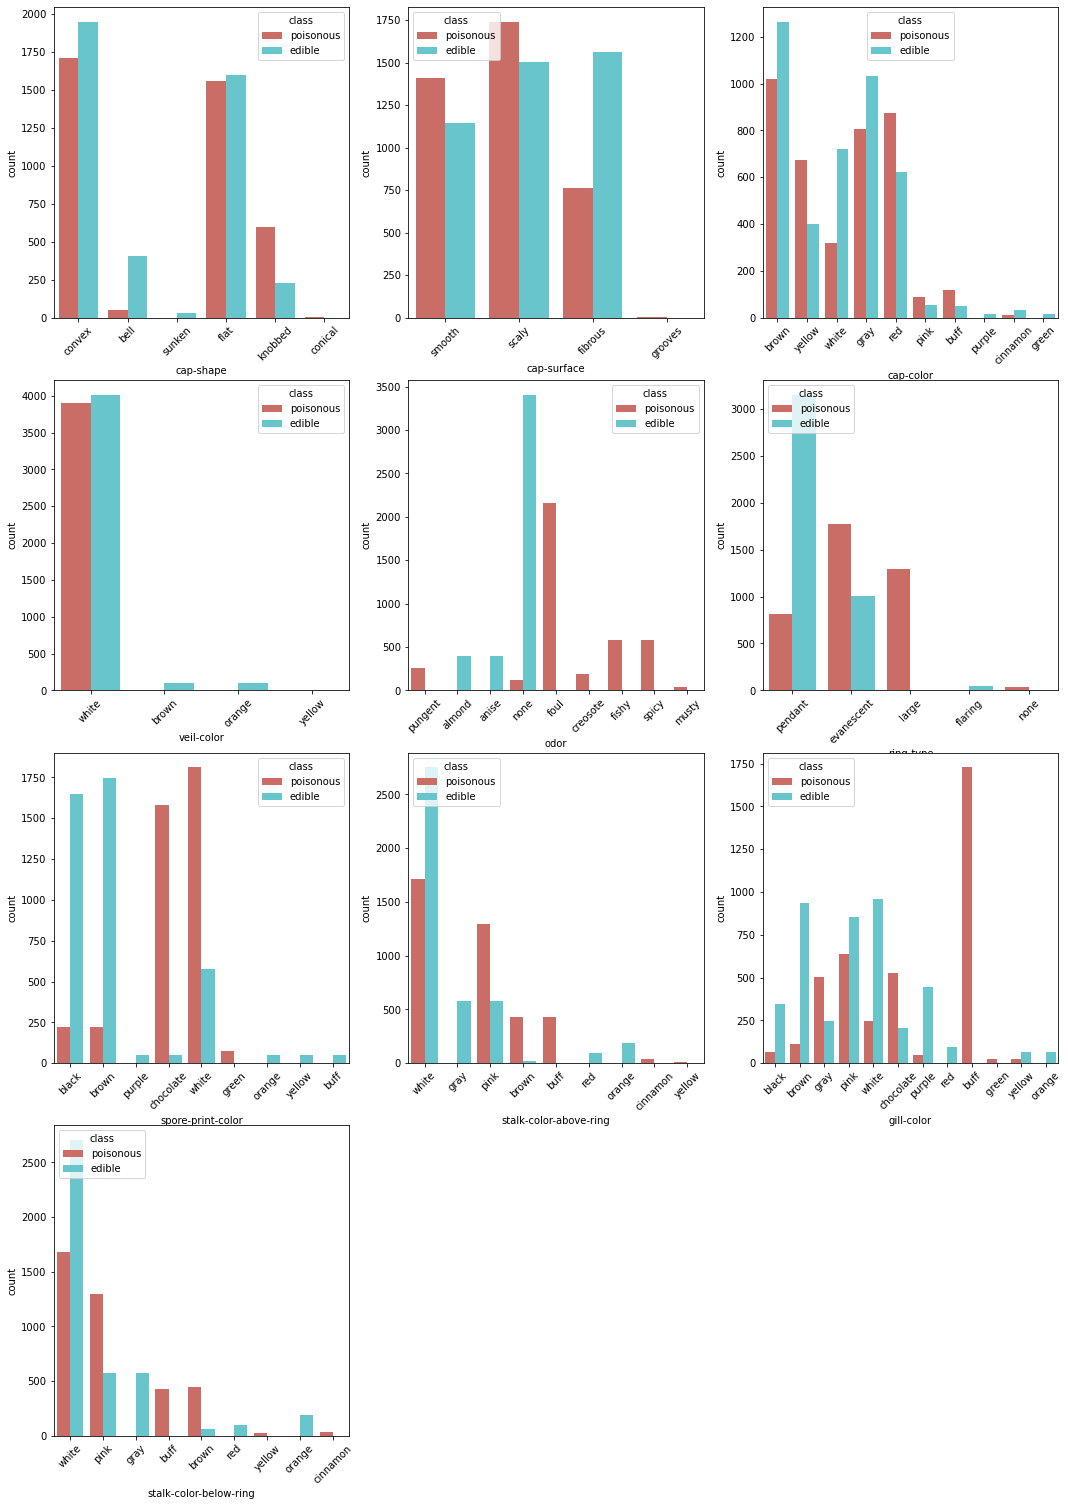

In [11]:
plt.figure(figsize = (18,40))
for i in enumerate(features):
    plt.subplot(6, 3, i[0]+1)
    sns.countplot(i[1], hue = 'class',palette = 'hls',data = mapped_df)
    plt.xticks(rotation = 45)

plt.show()

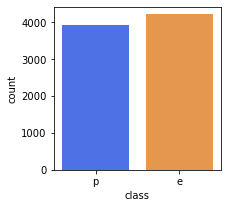

In [21]:
plt.figure(figsize = [3,3])
sns.countplot(df['class'] ,palette = 'bright', alpha = 0.8)
plt.show()

In [ ]:
# As we have equal number of p and e values, we dont need to oversample our data

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_df = df.apply(encoder.fit_transform)
encoded_df.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
487,0,4,0,4,0,5,1,0,1,7,0,3,2,2,7,7,0,2,1,4,3,5,5
7954,0,0,0,8,0,5,1,1,0,10,0,0,2,1,7,7,0,2,2,4,7,2,1
7021,1,2,2,2,0,7,1,0,1,0,1,0,1,1,6,7,0,2,1,0,7,4,0
3635,1,5,0,3,0,2,1,0,0,2,0,1,1,1,4,0,0,2,1,2,1,4,0
2031,0,2,2,4,0,5,1,1,0,3,1,3,2,0,7,7,0,2,1,0,3,3,1
4809,1,2,0,3,0,2,1,0,0,2,0,1,1,1,0,0,0,2,1,2,1,5,0
2460,0,5,0,4,1,5,1,0,0,10,1,1,2,2,7,6,0,2,1,4,2,4,0
1788,0,5,2,3,0,5,1,1,0,4,1,3,2,0,7,7,0,2,1,0,3,3,1
794,1,5,3,4,1,6,1,0,1,7,0,3,2,2,7,7,0,2,1,4,3,4,1
4701,1,5,3,9,0,2,1,0,0,7,0,1,1,1,4,6,0,2,1,2,1,4,4


In [13]:
# Separating the target column from other columns
X = encoded_df.iloc[:, 1:]
Y = encoded_df.iloc[:, 0]

In [19]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [15]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [16]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = (0.3))

In [17]:
# Hyperparameter Tuning
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [18]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

,model,best_score,best_params
0,svm,1.000000,"{'C': 10, 'kernel': 'rbf'}"
1,random_forest,1.000000,{'n_estimators': 5}
2,logistic_regression,0.960605,{'C': 10}


In [26]:
model_Svm = svm.SVC(gamma='auto')
model_Svm.fit(x_train, y_train)

SVC(gamma='auto')

In [34]:
pred = model_S.predict(x_test)
pred

array([1, 1, 1, ..., 1, 0, 0])

In [30]:
Y

0       1
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      1
18      1
19      1
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
30      0
31      1
32      0
33      0
34      0
35      0
36      0
37      1
38      0
39      0
40      0
41      0
42      0
43      1
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      1
54      1
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      1
79      0
80      0
81      1
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , pred)
cm

array([[1245,    0],
       [   0, 1193]], dtype=int64)

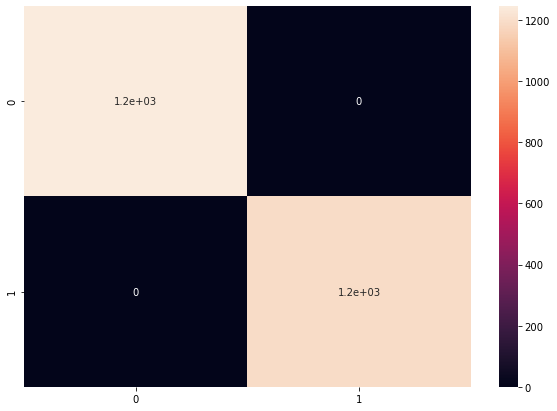

In [40]:
plt.figure(figsize = [10,7])
sns.heatmap(cm, annot = True)
plt.show()